In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
# Assuming your file is named 'your_file.csv'
df = pd.read_csv('HackathonData2024.csv')

In [4]:
df.columns

Index(['Well ID', 'Avg Pump Difference', 'Area', 'Lateral Length',
       'Fluid System', 'TVD', 'Development Strategy', 'DELAYED', 'BOUND_CODE',
       'CODEV_POSITION', 'CODEV_FORMATION_POSITION',
       'PARENT_CODEV_1050_WELL_COUNT', 'PARENT_IN_ZONE_MIN_HYPOT',
       'PARENT_OUT_ZONE_MIN_HYPOT', 'PARENT_IN_ZONE_MIN_MAP_DIST',
       'PARENT_OUT_ZONE_MIN_MAP_DIST', 'PARENT_1050_AVG_WELL_AGE',
       'PARENT_1050_MEDIAN_WELL_AGE', 'PARENT_1050_WELL_COUNT',
       'PARENT_3000_AVG_HYPOT_DIST', 'PARENT_3000_AVG_MAP_DIST',
       'PARENT_3000_AVG_TVD_DIST', 'PARENT_3000_AVG_WELL_AGE',
       'PARENT_3000_MEDIAN_WELL_AGE', 'PARENT_3000_WELL_COUNT',
       'CODEV_IN_ZONE_MIN_HYPOT', 'CODEV_OUT_ZONE_MIN_HYPOT',
       'CODEV_IN_ZONE_MIN_MAP_DIST', 'CODEV_1050_WELL_COUNT',
       'CODEV_3000_AVG_HYPOT_DIST', 'CODEV_3000_AVG_MAP_DIST',
       'CODEV_3000_AVG_TVD_DIST', 'CODEV_3000_AVG_WELL_AGE',
       'CODEV_3000_MEDIAN_WELL_AGE', 'CODEV_3000_WELL_COUNT',
       'Pressure Gradient (psi/ft)

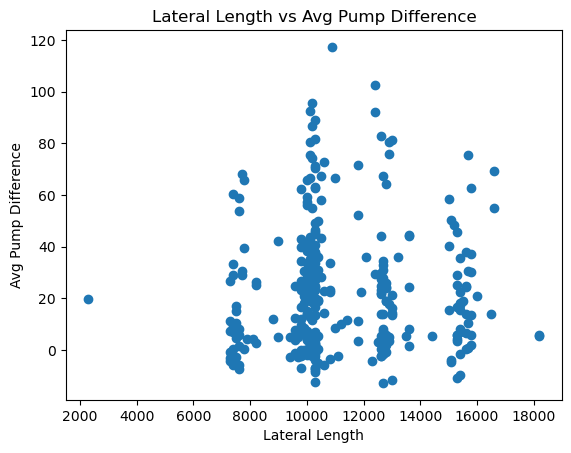

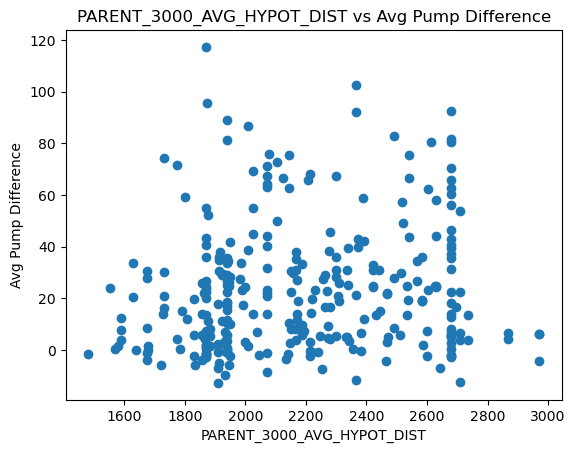

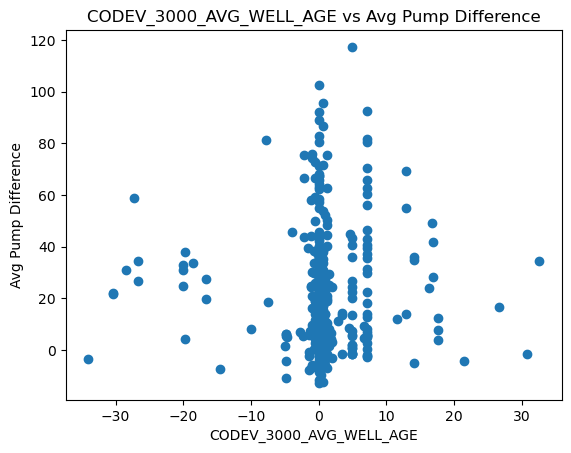

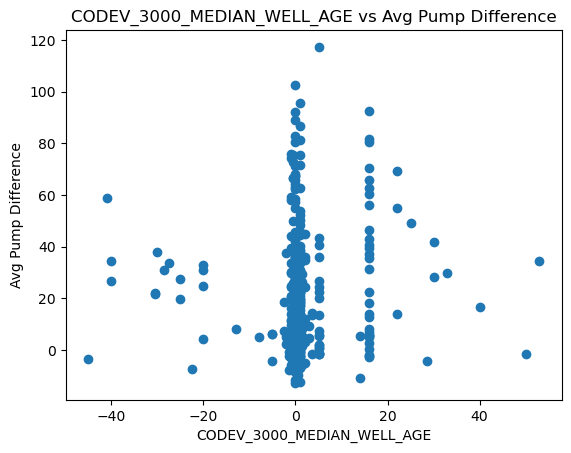

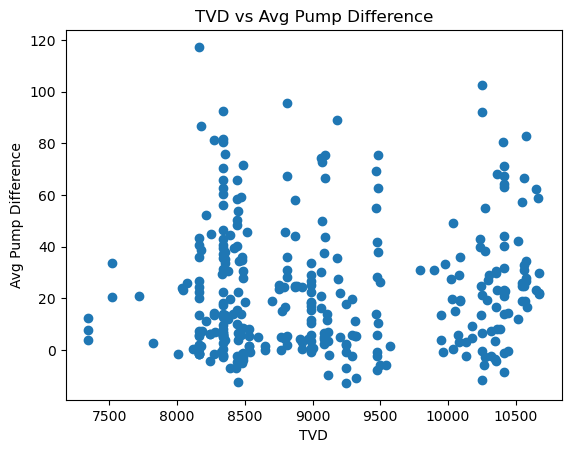

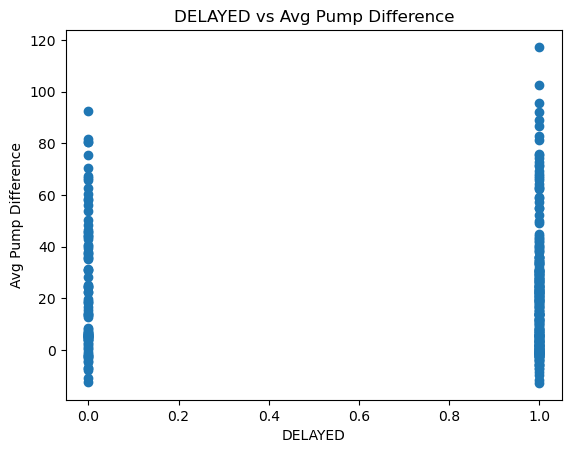

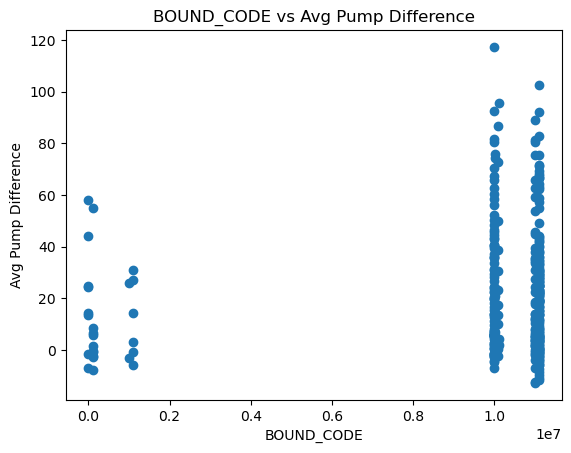

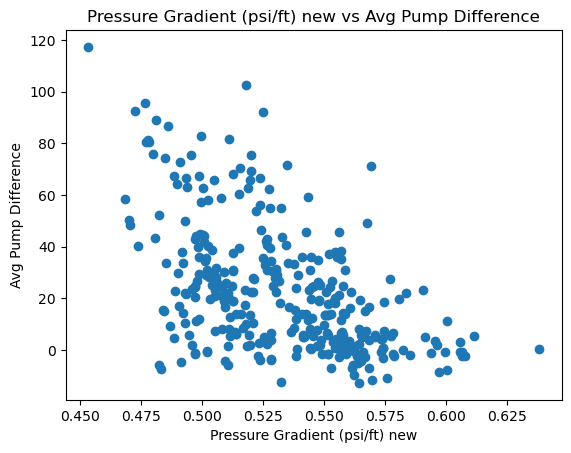

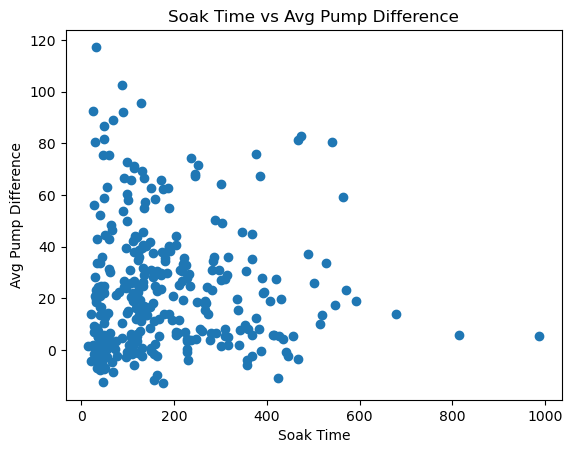

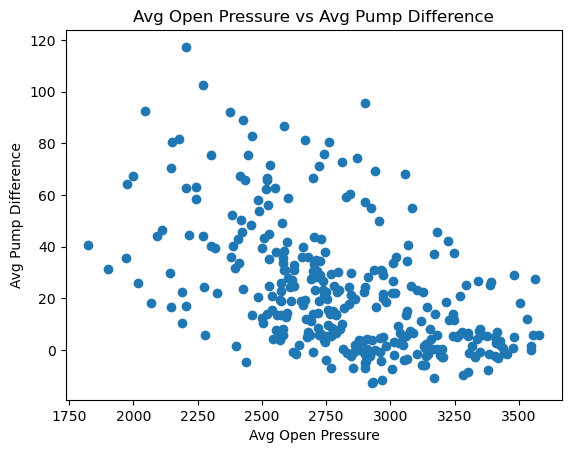

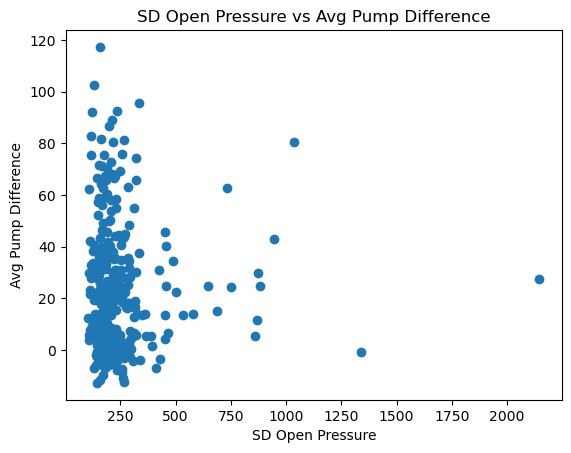

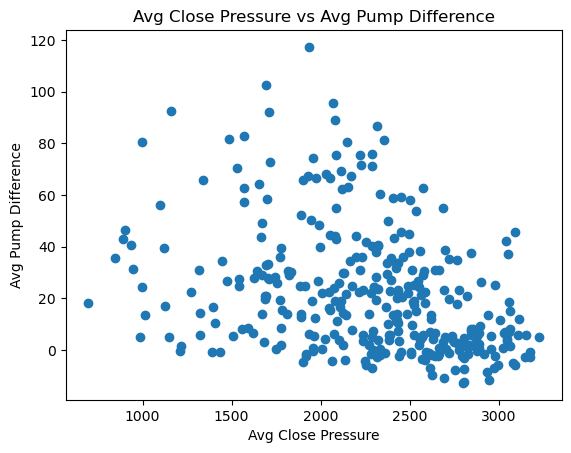

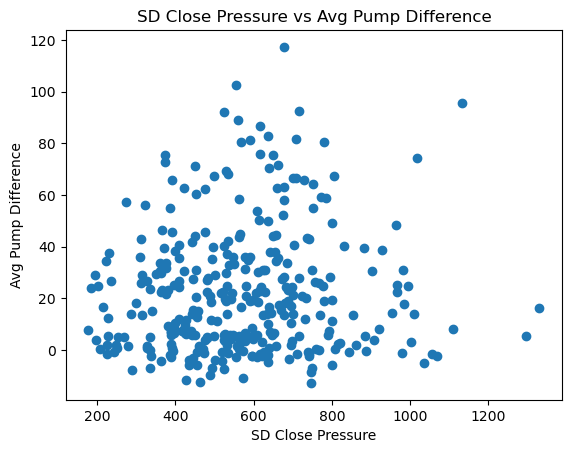

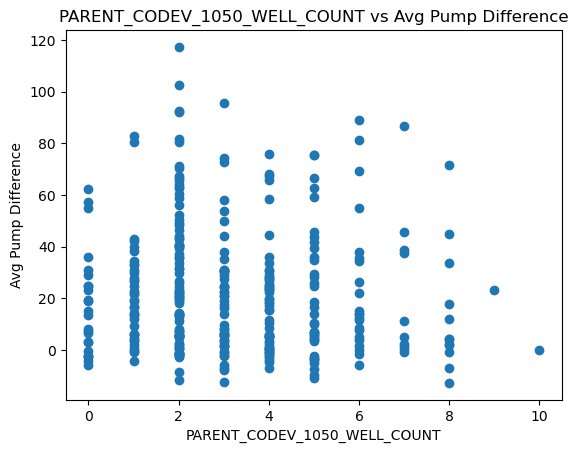

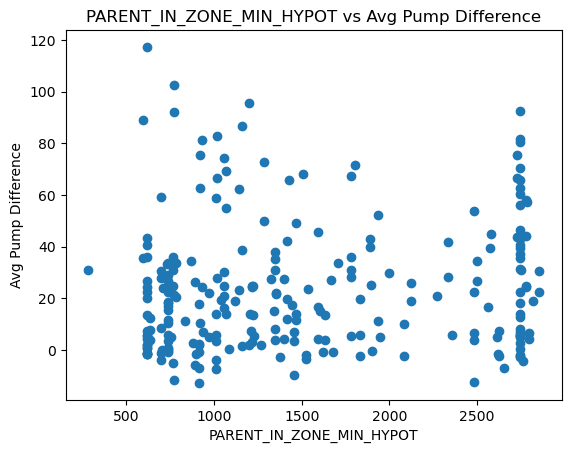

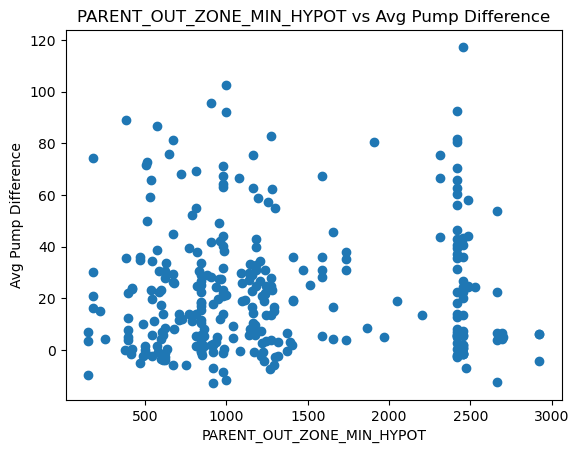

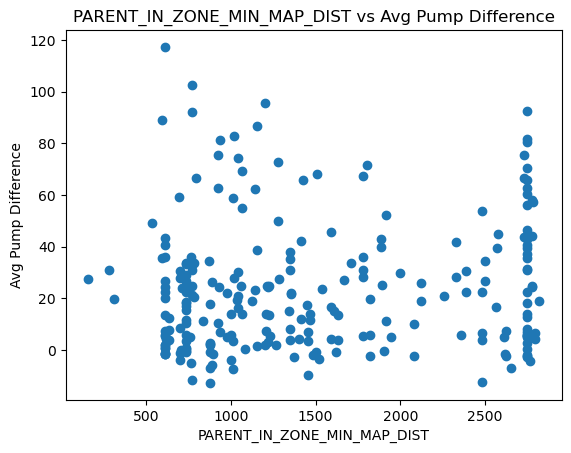

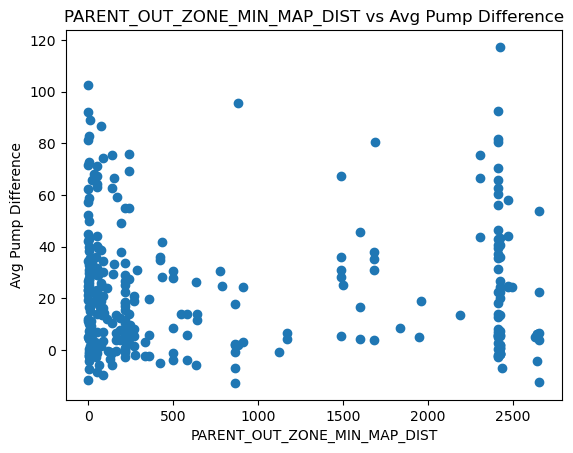

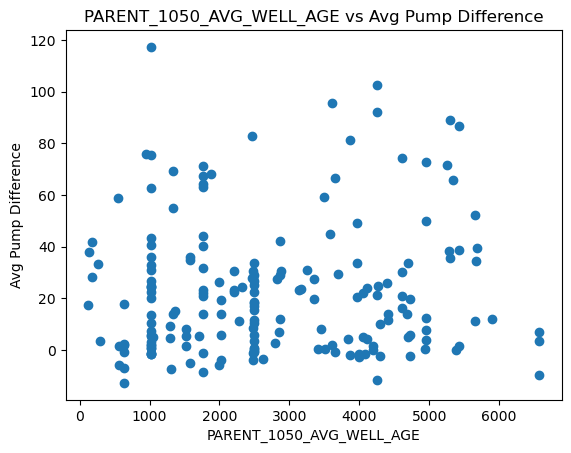

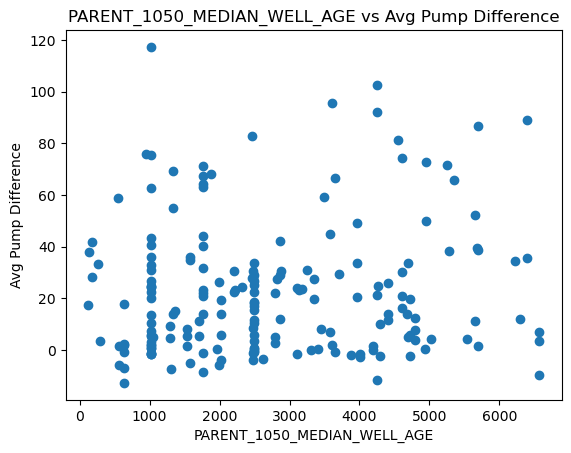

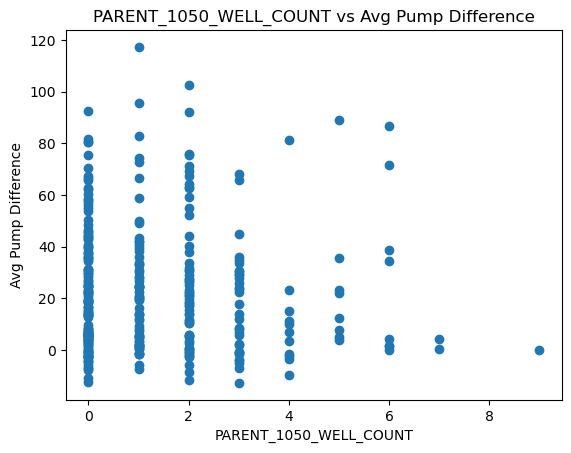

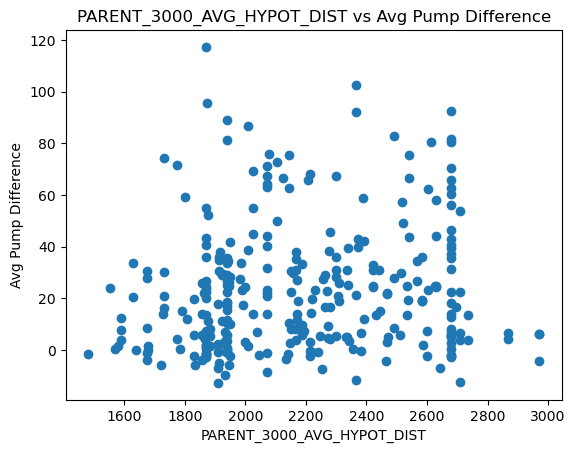

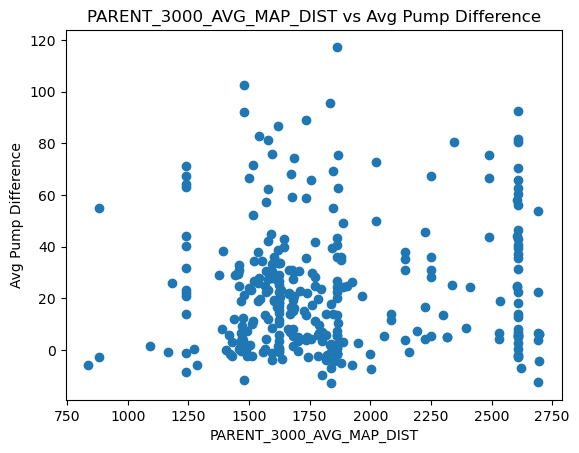

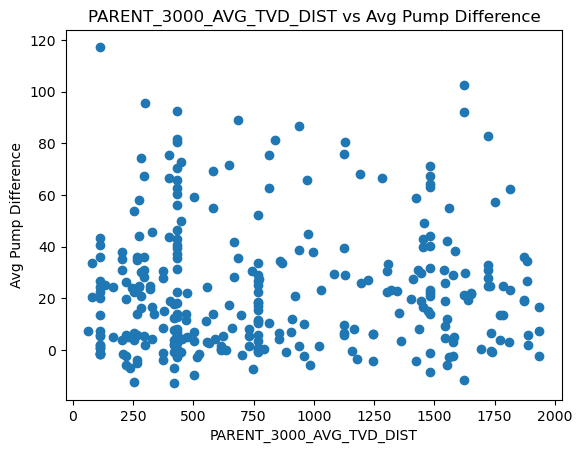

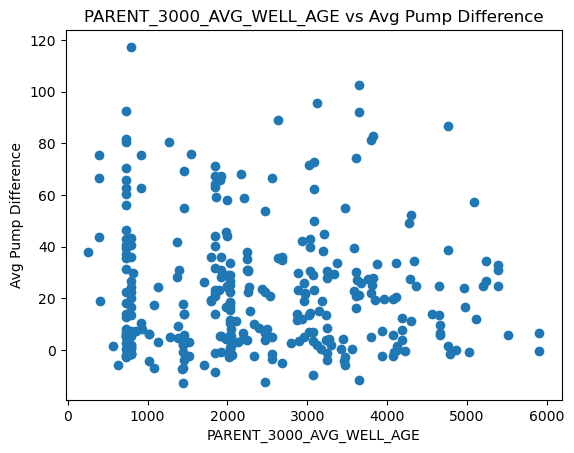

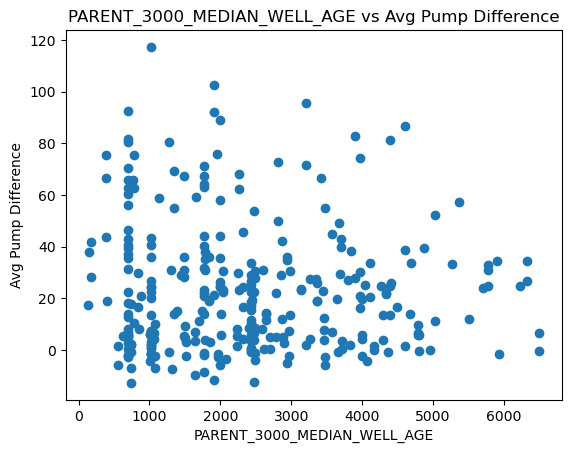

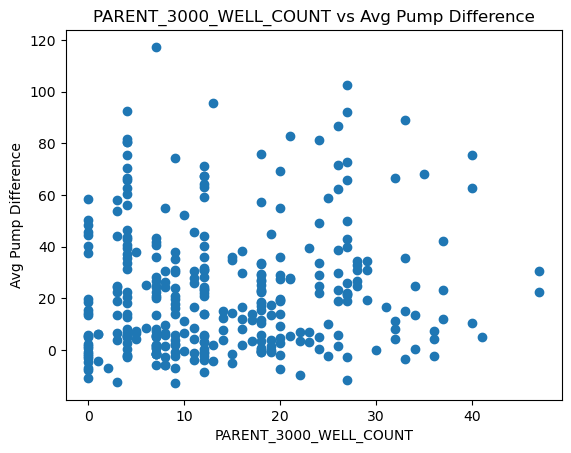

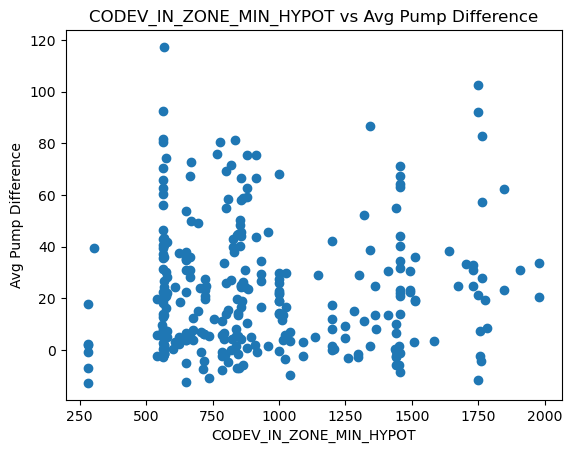

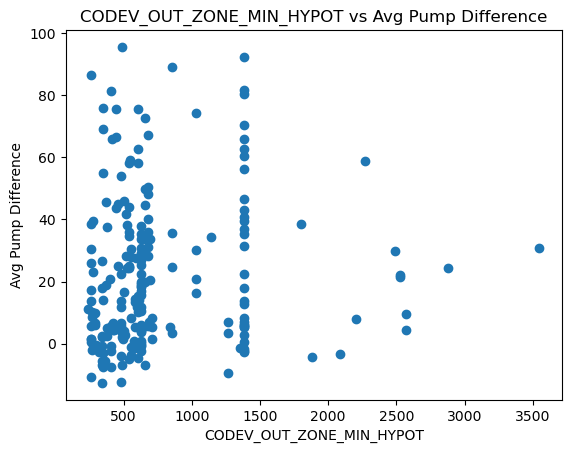

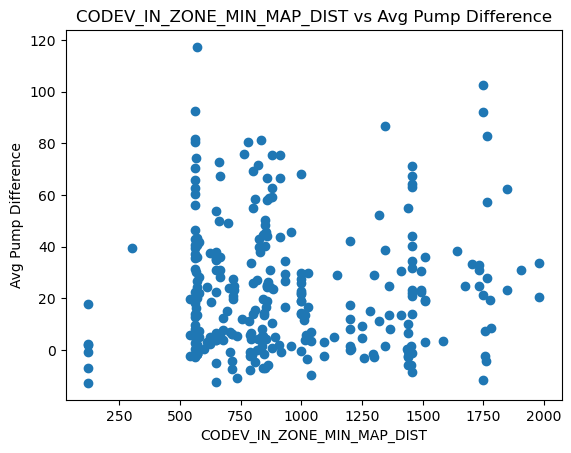

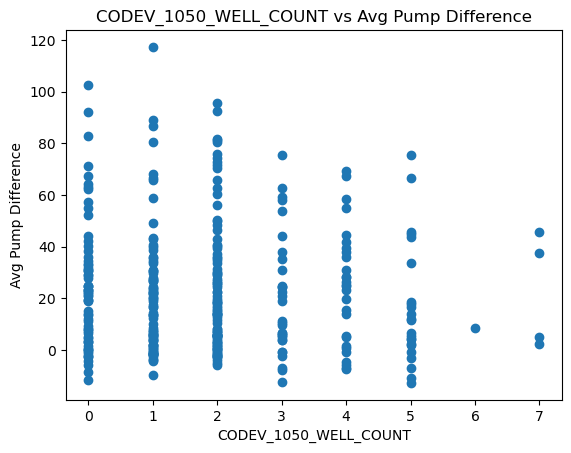

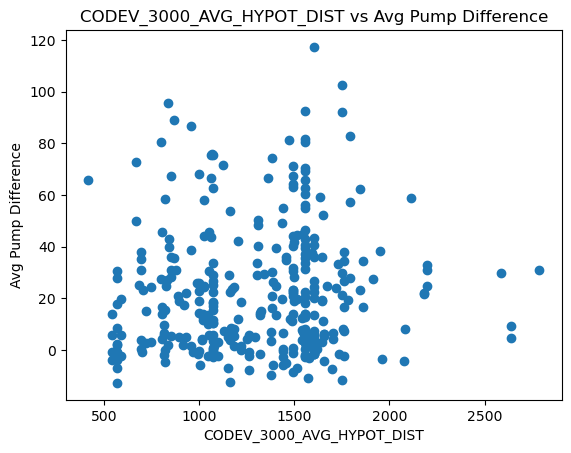

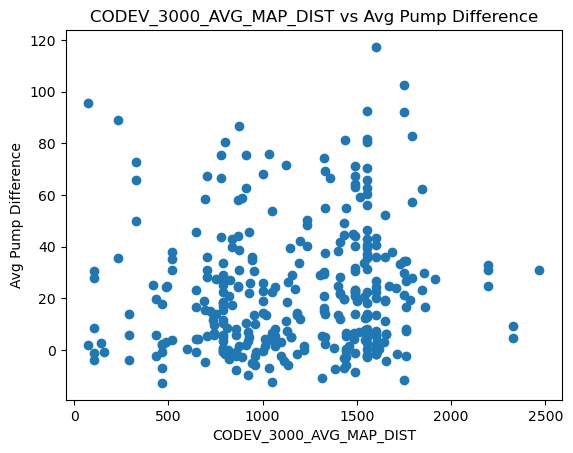

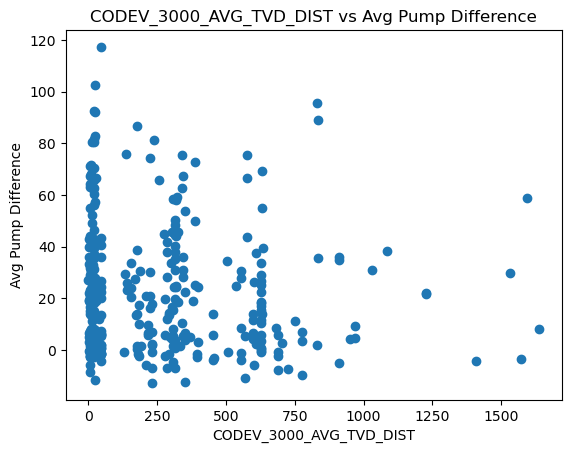

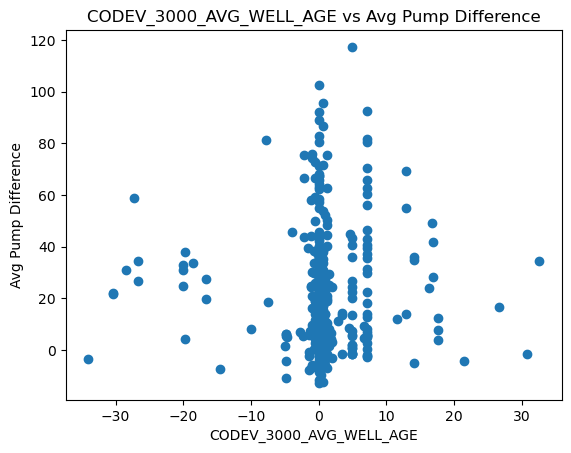

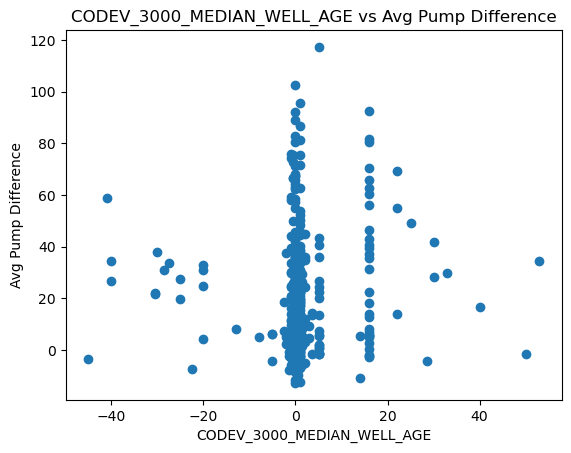

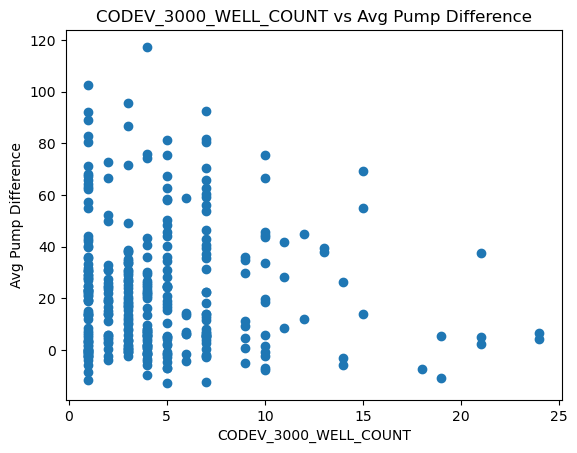

In [48]:
# Specify the y-column
y_column = 'Avg Pump Difference'

x_columns_to_compare = ['Lateral Length', 'PARENT_3000_AVG_HYPOT_DIST', 
                        'CODEV_3000_AVG_WELL_AGE', 'CODEV_3000_MEDIAN_WELL_AGE','TVD', 'DELAYED', 
                        'BOUND_CODE','Pressure Gradient (psi/ft) new', 'Soak Time', 'Avg Open Pressure', 
                        'SD Open Pressure', 'Avg Close Pressure', 'SD Close Pressure', 'PARENT_CODEV_1050_WELL_COUNT', 
                        'PARENT_IN_ZONE_MIN_HYPOT', 'PARENT_OUT_ZONE_MIN_HYPOT', 'PARENT_IN_ZONE_MIN_MAP_DIST',
                        'PARENT_OUT_ZONE_MIN_MAP_DIST', 'PARENT_1050_AVG_WELL_AGE',
                        'PARENT_1050_MEDIAN_WELL_AGE', 'PARENT_1050_WELL_COUNT',
                        'PARENT_3000_AVG_HYPOT_DIST', 'PARENT_3000_AVG_MAP_DIST', 'PARENT_3000_AVG_TVD_DIST', 
                        'PARENT_3000_AVG_WELL_AGE','PARENT_3000_MEDIAN_WELL_AGE', 'PARENT_3000_WELL_COUNT',
                        'CODEV_IN_ZONE_MIN_HYPOT', 'CODEV_OUT_ZONE_MIN_HYPOT', 'CODEV_IN_ZONE_MIN_MAP_DIST', 
                        'CODEV_1050_WELL_COUNT', 'CODEV_3000_AVG_HYPOT_DIST', 'CODEV_3000_AVG_MAP_DIST',
                        'CODEV_3000_AVG_TVD_DIST', 'CODEV_3000_AVG_WELL_AGE',
                        'CODEV_3000_MEDIAN_WELL_AGE', 'CODEV_3000_WELL_COUNT']
     

# Iterate through each specified x-column and create plots
for x_column in x_columns_to_compare:
    plt.scatter(df[x_column], df[y_column])
    plt.title(f'{x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

In [49]:
# Calculate correlation coefficients
correlation_results = {}
for x_column in x_columns_to_compare:
    correlation = df[x_column].corr(df[y_column])
    correlation_results[x_column] = correlation

# Display correlation coefficients
print("Correlation Coefficients:")
for x_column, correlation in correlation_results.items():
    print(f"{x_column} vs {y_column}: {correlation}")

Correlation Coefficients:
Lateral Length vs Avg Pump Difference: 0.03545791962761374
PARENT_3000_AVG_HYPOT_DIST vs Avg Pump Difference: 0.13471731501809814
CODEV_3000_AVG_WELL_AGE vs Avg Pump Difference: -0.0009704861565783391
CODEV_3000_MEDIAN_WELL_AGE vs Avg Pump Difference: 0.04384861507949136
TVD vs Avg Pump Difference: 0.08821400366258676
DELAYED vs Avg Pump Difference: -0.0429253790507218
BOUND_CODE vs Avg Pump Difference: 0.10648042817287244
Pressure Gradient (psi/ft) new vs Avg Pump Difference: -0.5317895801437069
Soak Time vs Avg Pump Difference: 0.029291594699279017
Avg Open Pressure vs Avg Pump Difference: -0.5115187867041873
SD Open Pressure vs Avg Pump Difference: 0.006745394899309189
Avg Close Pressure vs Avg Pump Difference: -0.35672687603730163
SD Close Pressure vs Avg Pump Difference: 0.07989905532655965
PARENT_CODEV_1050_WELL_COUNT vs Avg Pump Difference: -0.0602354662650427
PARENT_IN_ZONE_MIN_HYPOT vs Avg Pump Difference: 0.09706394055009843
PARENT_OUT_ZONE_MIN_HYPOT

In [50]:
# Rank the x-columns based on correlation coefficients
ranked_columns = sorted(correlation_results, key=correlation_results.get, reverse=True)

# Display the top 10 correlated x-columns
top_10_columns = ranked_columns[:10]
print("Top 10 Correlated X-Columns:")
for x_column in top_10_columns:
    correlation = correlation_results[x_column]
    print(f"{x_column} vs {y_column}: {correlation}")

Top 10 Correlated X-Columns:
PARENT_3000_AVG_HYPOT_DIST vs Avg Pump Difference: 0.13471731501809814
PARENT_1050_MEDIAN_WELL_AGE vs Avg Pump Difference: 0.10869432699528063
BOUND_CODE vs Avg Pump Difference: 0.10648042817287244
PARENT_3000_WELL_COUNT vs Avg Pump Difference: 0.1058808087765133
PARENT_IN_ZONE_MIN_HYPOT vs Avg Pump Difference: 0.09706394055009843
CODEV_OUT_ZONE_MIN_HYPOT vs Avg Pump Difference: 0.09420777931462834
PARENT_IN_ZONE_MIN_MAP_DIST vs Avg Pump Difference: 0.0911655696725077
CODEV_3000_AVG_MAP_DIST vs Avg Pump Difference: 0.08884966457333143
TVD vs Avg Pump Difference: 0.08821400366258676
PARENT_1050_AVG_WELL_AGE vs Avg Pump Difference: 0.08163035391431449


<Figure size 1200x1000 with 0 Axes>

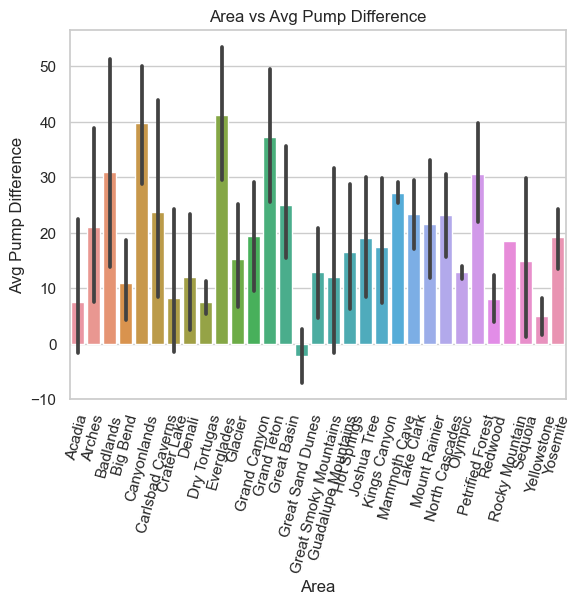

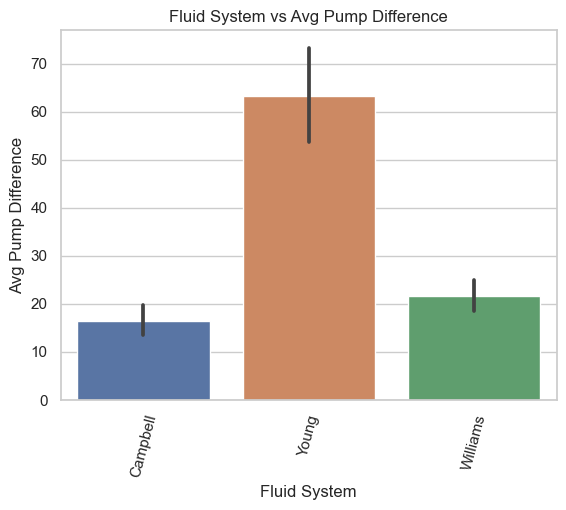

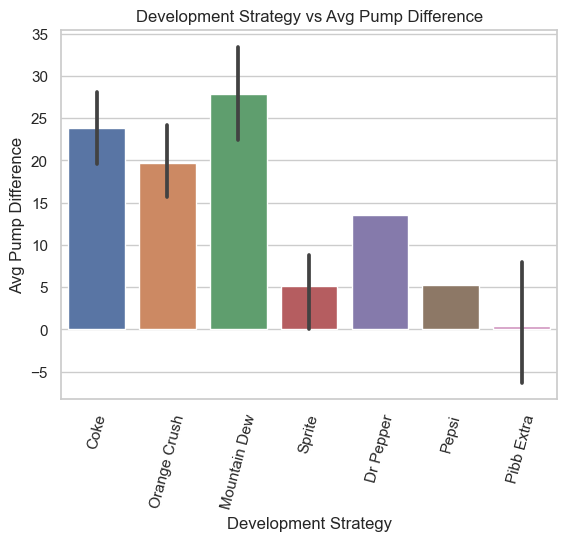

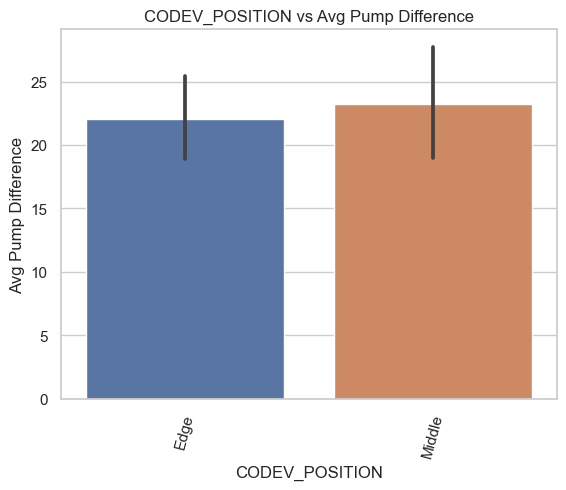

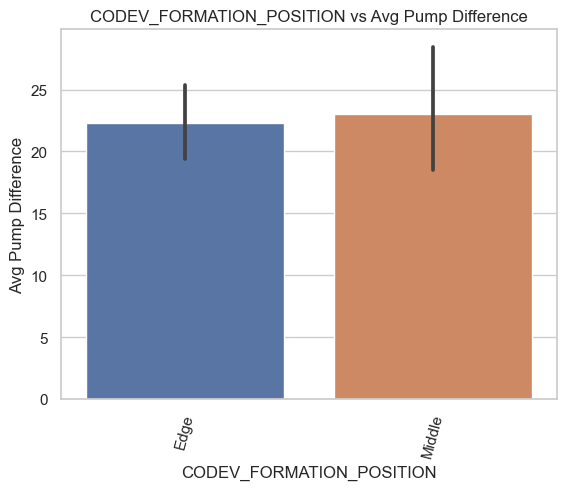

In [64]:
categorical_columns = ['Area','Fluid System', 'Development Strategy',
                       'CODEV_POSITION', 'CODEV_FORMATION_POSITION']

# Set the overall size of the plot
plt.figure(figsize=(12, 10))

# Create individual bar plots for each categorical column
for col in categorical_columns:
    plt.figure()
    sns.barplot(x=col, y=y_column, data=df)
    plt.title(f"{col} vs {y_column}")
    plt.xlabel(col)
    plt.ylabel(y_column)
    plt.xticks(rotation=75)
    plt.show()